<h1 align=center>Análisis Serie Temporal</h1>

<h2 align=center>Método de la ventana y horizonte</h2>



Serie temporal de estudio: **Hourly wind capacity factors for the EU-28 plus Norway and Switzerland**.

   1.- Representación gráfica de la red.
    
   2.- Separación de la serie en *train* y *test*.
    
   3.- Generación de Features: método de la ventana.
    
   4.- Normalización de los datos

In [1]:
%matplotlib inline
import os
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from IPython.display import Image
from sklearn.cross_validation import train_test_split

In [2]:
PATH = '../data/renewablesNinja'
PLOT_PATH = '../../plots/experiments/'
FOLDER = 'ninja_europe_wind'
FILE = 'renewables_ninja_europe_wind_output_1_current.csv'

fileName = os.path.join(PATH, FOLDER, FILE)

## 1.-) Cargamos los datos y dibujamos la serie

In [3]:
dateparse = lambda x: pd.datetime.strptime(x, '%d/%m/%Y %H:%M')

windCurrent = pd.read_csv(fileName, 
                          parse_dates=['GMT'], date_parser=dateparse, 
                          index_col=0)
windCurrent.head()

,Austria,Belgium,Bulgaria,Croatia,Cyprus,Czech Republic,Denmark,Estonia,Finland,France,...,Netherlands,Norway,Poland,Portugal,Romania,Slovakia,Slovenia,Spain,Sweden,Switzerland
GMT,,,,,,,,,,,,,,,,,,,,,
1985-01-01 00:00:00,0.058673,0.502539,0.597301,0.192928,0.078246,0.163293,0.219672,0.074725,0.366605,0.262500,...,0.487281,0.373055,0.187184,0.254569,0.319624,0.031699,0.233739,0.357391,0.266999,0.080952
1985-01-01 01:00:00,0.051473,0.536551,0.593594,0.182456,0.073624,0.174472,0.229487,0.075825,0.358066,0.271736,...,0.524175,0.360592,0.186973,0.226412,0.311763,0.031273,0.228339,0.334591,0.263941,0.094747
1985-01-01 02:00:00,0.047168,0.575349,0.584599,0.169839,0.057452,0.189036,0.245597,0.076584,0.353883,0.285842,...,0.557647,0.351483,0.184407,0.209310,0.298303,0.030340,0.222214,0.313906,0.261618,0.114087
1985-01-01 03:00:00,0.046772,0.618309,0.560153,0.158150,0.046010,0.197187,0.268387,0.075107,0.362064,0.307607,...,0.583784,0.356610,0.178373,0.200416,0.275352,0.027062,0.221755,0.283218,0.267271,0.137718
1985-01-01 04:00:00,0.049825,0.651812,0.534090,0.141470,0.043563,0.206275,0.296421,0.073350,0.375112,0.328046,...,0.594067,0.367233,0.168056,0.195278,0.253577,0.027707,0.213890,0.252073,0.277248,0.152246


In [4]:
wc_spain=windCurrent[['Spain']]

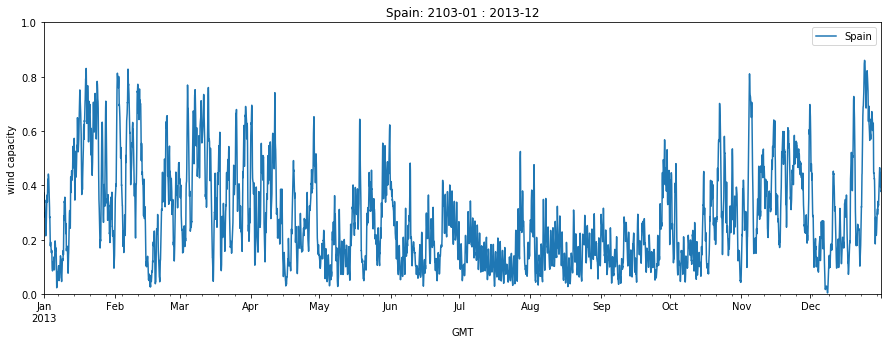

In [5]:
# 
# Seleccionamos un año determinado
#
es_wc_2013= windCurrent[['Spain']].loc['2013-01-01 00:00:00':'2013-12-31 23:00:00']
ax= es_wc_2013.plot(figsize=(15,5), 
                    ylim=(0,1),
                    title='Spain: 2103-01 : 2013-12')
ax.set_ylabel('wind capacity')

## 2.-) Generación de features

In [84]:
def features_generator(ts, feature_window=10, horizont=1, padding=0):
    """
    
    """
    timesteps = len(ts) - (feature_window + horizont + padding - 1)
    
    features = np.zeros((timesteps, feature_window), dtype = np.float32)
    
    for t in range(padding, timesteps):
        # features
        features[t][0: feature_window] = ts[t : t+feature_window]
        
    return features


def labels_generator(ts, feature_window=10, horizont=1, padding=0):
    """
    
    """
    timesteps = len(ts) - (feature_window + horizont + padding - 1)
    
    labels = np.zeros((timesteps), dtype=np.float32)
    
    for t in range(padding, timesteps):
        # labels
        offset = t + feature_window + horizont - 1
        labels[t] = ts[offset]
        
    return labels

In [35]:
features, h1 = preproceso_window(es_wc_2013['Spain'].values)

In [49]:
fh2, h2 = preproceso_window(es_wc_2013['Spain'].values, horizont=2)

In [102]:
timeSeries = es_wc_2013['Spain'].values
window_size = 4

dataSets = []

for h in range(1, 25):
    features = features_generator(timeSeries, feature_window=window_size, 
                                  horizont=h)
    labels = labels_generator(timeSeries, feature_window=window_size, 
                              horizont=h)
    
    df = pd.DataFrame(features)
    
    df['h_{0}'.format(h)] = labels
    
    dataSets.append(df)

In [103]:
dataSets[0].head()

,0,1,2,3,h_1
0,0.372106,0.353210,0.335363,0.338887,0.345464
1,0.353210,0.335363,0.338887,0.345464,0.346458
2,0.335363,0.338887,0.345464,0.346458,0.342922
3,0.338887,0.345464,0.346458,0.342922,0.336491
4,0.345464,0.346458,0.342922,0.336491,0.322841


In [104]:
dataSets[1].head() 

,0,1,2,3,h_2
0,0.372106,0.353210,0.335363,0.338887,0.346458
1,0.353210,0.335363,0.338887,0.345464,0.342922
2,0.335363,0.338887,0.345464,0.346458,0.336491
3,0.338887,0.345464,0.346458,0.342922,0.322841
4,0.345464,0.346458,0.342922,0.336491,0.291398


In [105]:
dataSets[2].head()

,0,1,2,3,h_3
0,0.372106,0.353210,0.335363,0.338887,0.342922
1,0.353210,0.335363,0.338887,0.345464,0.336491
2,0.335363,0.338887,0.345464,0.346458,0.322841
3,0.338887,0.345464,0.346458,0.342922,0.291398
4,0.345464,0.346458,0.342922,0.336491,0.283055


In [106]:
dataSets[3].head()

,0,1,2,3,h_4
0,0.372106,0.353210,0.335363,0.338887,0.336491
1,0.353210,0.335363,0.338887,0.345464,0.322841
2,0.335363,0.338887,0.345464,0.346458,0.291398
3,0.338887,0.345464,0.346458,0.342922,0.283055
4,0.345464,0.346458,0.342922,0.336491,0.289411


### Método de la ventana -- estrategías --

In [124]:
dataset_h1 = dataSets[0].ix[0:4,:]
dataset_h1.head()

,0,1,2,3,h_1
0,0.372106,0.353210,0.335363,0.338887,0.345464
1,0.353210,0.335363,0.338887,0.345464,0.346458
2,0.335363,0.338887,0.345464,0.346458,0.342922
3,0.338887,0.345464,0.346458,0.342922,0.336491
4,0.345464,0.346458,0.342922,0.336491,0.322841


In [136]:
dataset_h1.ix[0,:].values

array([ 0.37210599,  0.35321   ,  0.335363  ,  0.33888701,  0.34546399], dtype=float32)

In [139]:
dataset_h1.ix[1:,4:].values.flatten()

array([ 0.34645799,  0.342922  ,  0.33649099,  0.32284099], dtype=float32)